<a href="https://colab.research.google.com/github/yaraaldos/Diabetes-risk-prediction/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Part one (data analysis)`**

## Part 1: Data Analysis

In this part, we start by loading the dataset from our GitHub repository and visualizing the basic distributions of the categorical variables **Gender** and **CLASS**. These plots help us understand the balance of the data before preprocessing.





**Uploading data and viewing some samples :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url) # to upload and read data
df_copy= df.copy() # the one used for for data of cleaning (preprocessed)

print("Loaded shape:", df.shape) # to show the number of columns and rows
print("\nHead:")
print(df.head()) # shows a sample of 5 rows of all coulmns (This step i put to ensure the data loaded correctly)

Loaded shape: (1000, 14)

Head:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


**1.1 Five number summery :**

In [ ]:
df.describe() # for showing the five number summery (statistical summury)

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


**1.1 calculate the variance :**

In [ ]:
cols = ['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
df[cols].var()

,0
AGE,77.426643
Urea,8.615196
Cr,3598.169921
HbA1c,6.421172
Chol,1.694521
TG,1.963294
HDL,0.436146
LDL,1.243452
VLDL,13.421960
BMI,24.625296


This code calculates the variance for all numeric attributes in the dataset.
The results show how much each variable deviates from its mean value.
 Some columns like ID or No_Pation have very large variances because they are identifiers,
 while attributes such as AGE, Chol, and BMI show realistic spread in their values.

**1.2 Graphs:**

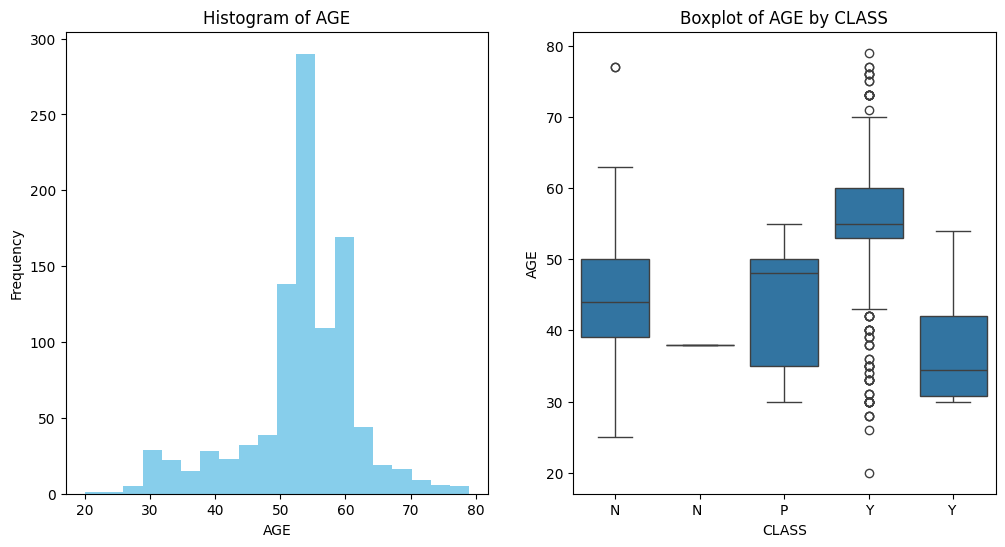

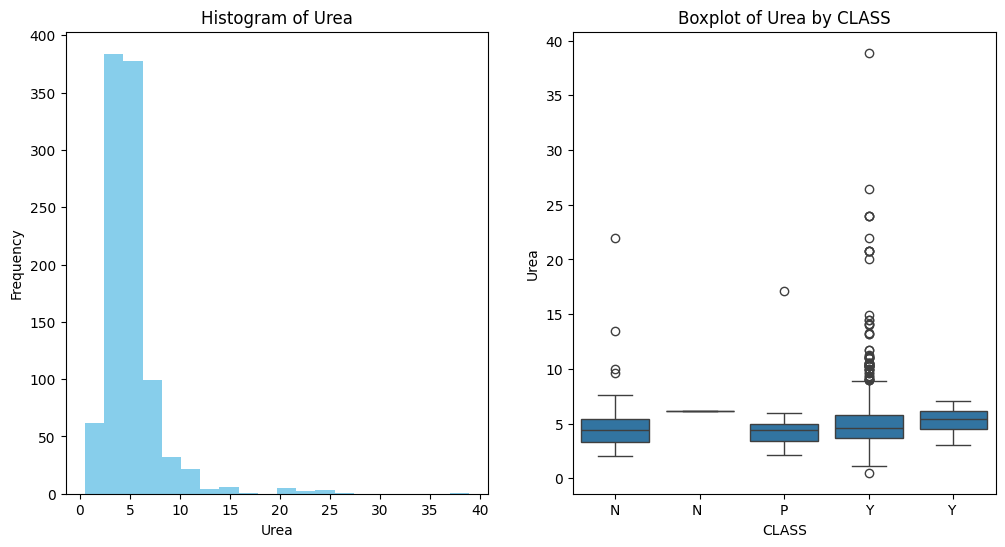

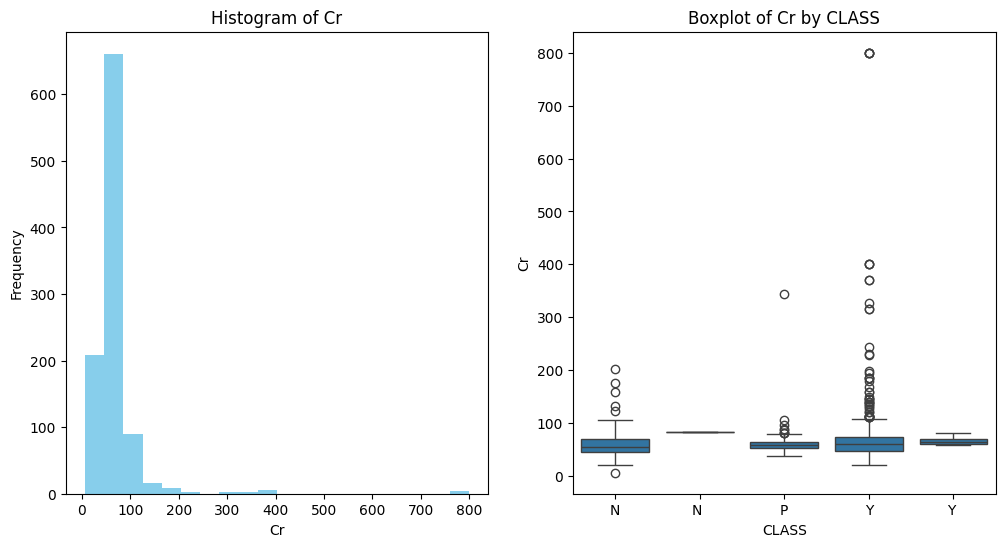

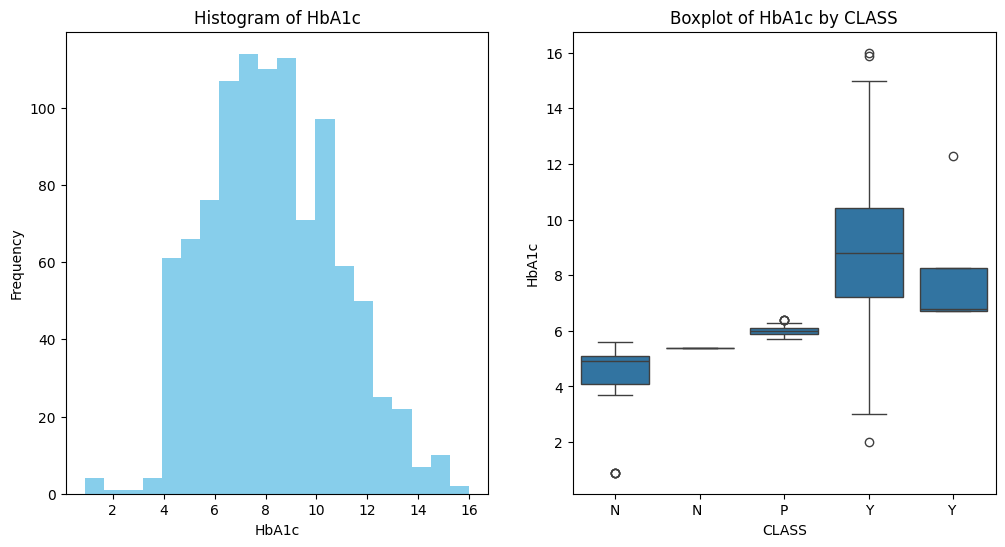

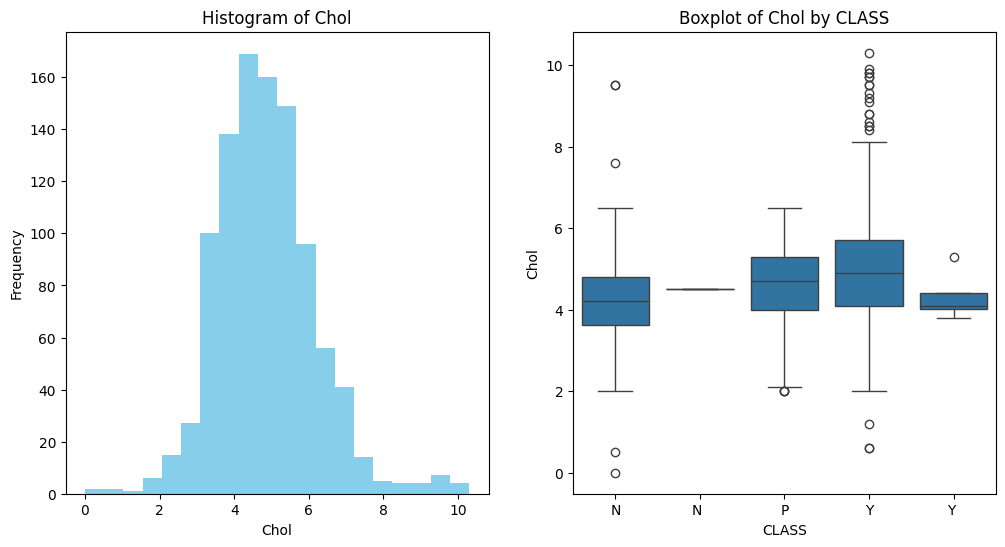

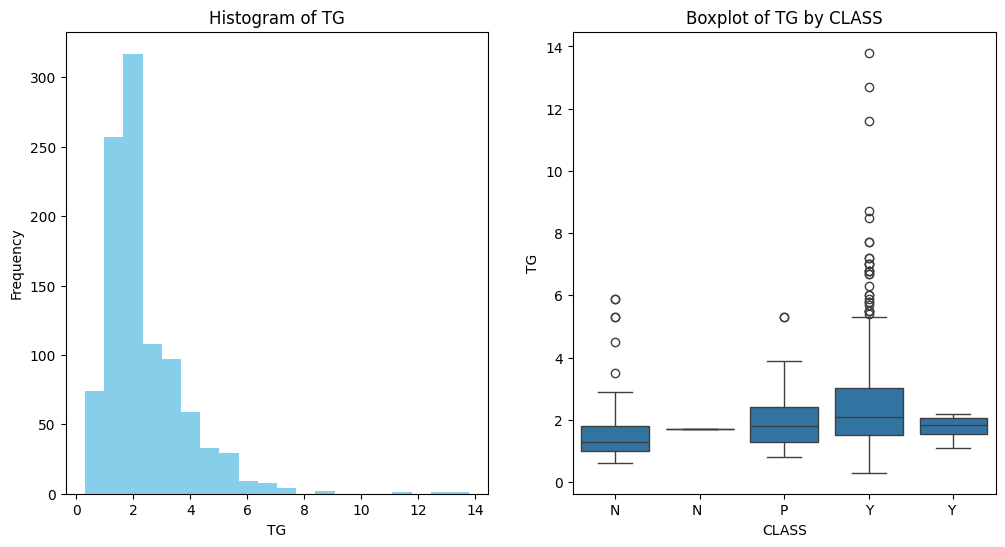

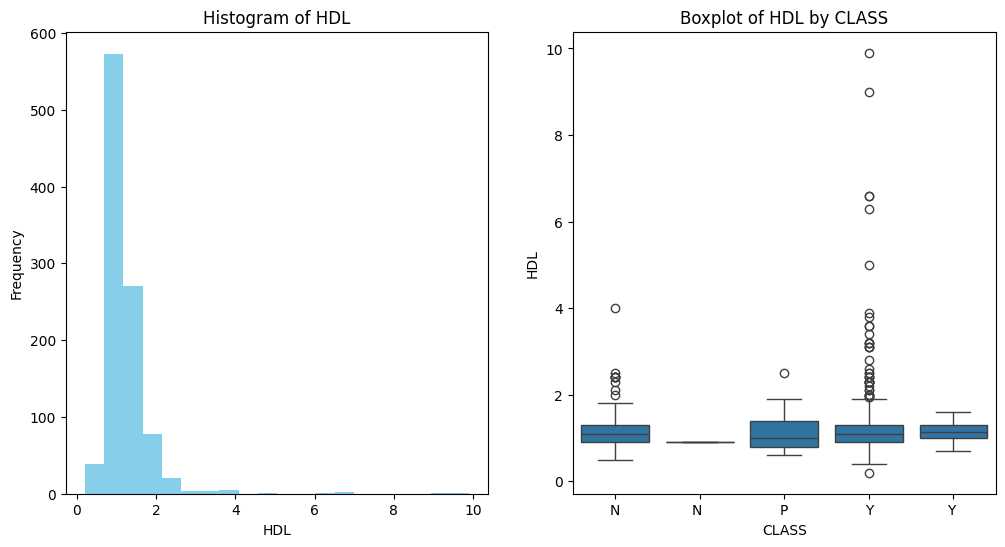

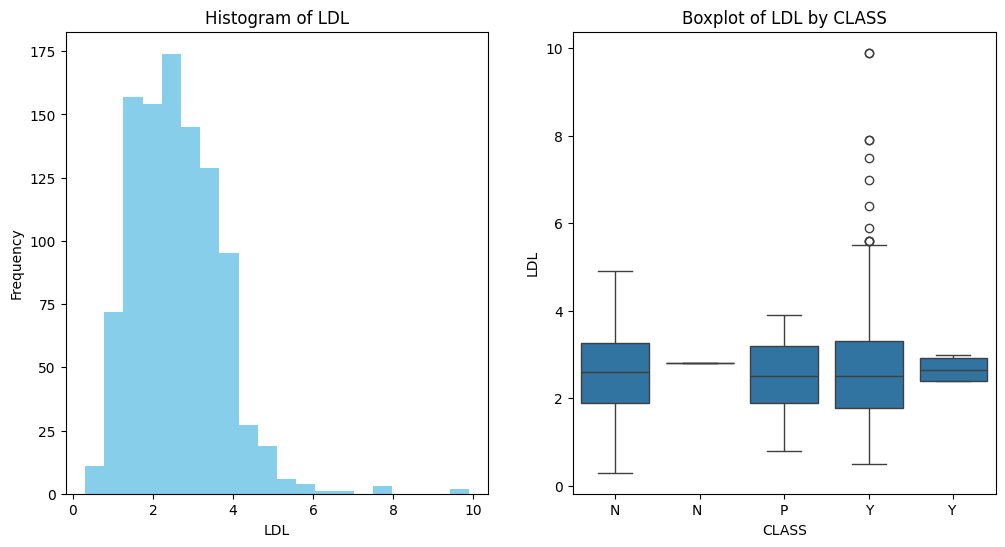

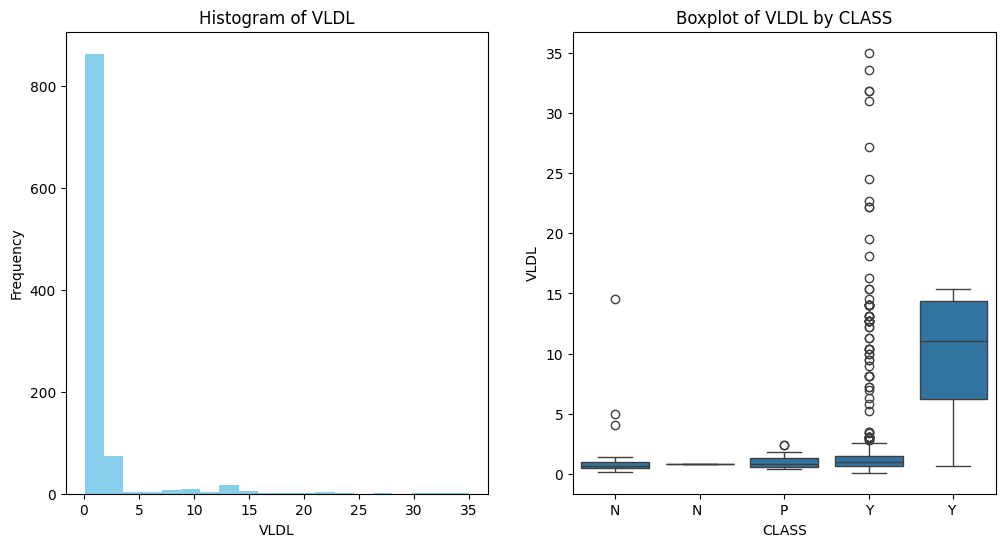

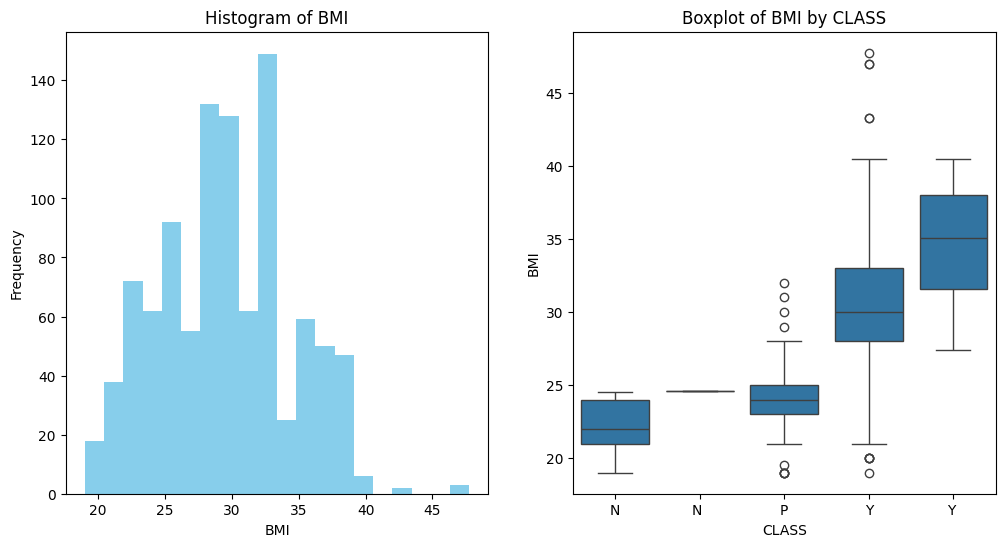

In [ ]:

import seaborn as sns


numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["ID", "No_Pation"]]


for col in numeric_cols:
    vals = df[col].dropna()

    plt.figure(figsize=(12,6))

     #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(vals, bins=20, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

     # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="CLASS", y=col, data=df)
    plt.title(f"Boxplot of {col} by CLASS")
    plt.xlabel("CLASS")
    plt.ylabel(col)



plt.show()


















The attributes ID and No_Pation were excluded from the visualizations because they are only identifier fields. They do not provide any statistical or meaningful information about the patients or their diabetes condition. Therefore, only relevant numerical and categorical features were included in the graphs.

 **graph description**

--------------------------------------------------------------------------------
🔹AGE
The histogram of AGE shows that most values are centered in the middle range, with a fairly balanced spread. The boxplot indicates the presence of a few outliers, mainly within the “Y” class. During preprocessing, these outliers will be handled, and normalization will help maintain consistent scaling among features.

--------------------------------------------------------------------------------

🔹 UREA
The histogram of UREA shows a strong right skew, where most values are clustered near the lower end. The boxplot reveals several outliers spread across the classes. This attribute will require both outlier handling and normalization to balance the distribution and reduce the skew effect.

--------------------------------------------------------------------------------

🔹 CR
The histogram of CR displays heavy skewness, with most data points near smaller values and a few extremely high ones. The boxplot highlights many outliers, especially in the “Y” class. This feature clearly requires outlier treatment and normalization to stabilize the range and minimize distortion.

--------------------------------------------------------------------------------

🔹 HbA1C
The histogram of HbA1C appears moderately distributed, though slightly skewed. The boxplot shows some visible outliers in the “Y” class. It will benefit from normalization and light outlier adjustment to ensure balanced scaling across all classes.

--------------------------------------------------------------------------------

🔹 CHOL
The histogram of CHOL shows a slightly right-skewed distribution, where most values are centered but extend slightly toward higher levels. The boxplot reveals some visible outliers, especially within the “Y” class. This indicates moderate variation and suggests that normalization and outlier handling will help improve data consistency during preprocessing.

--------------------------------------------------------------------------------

🔹 TG
The histogram of TG is strongly skewed to the right, with most values concentrated at low levels. The boxplot shows numerous outliers, particularly in the “Y” class. This variable clearly requires outlier handling and normalization during preprocessing to improve balance and consistency.

--------------------------------------------------------------------------------

🔹 HDL
The histogram of HDL shows sharp skewness, with most values concentrated near the lower end. The boxplot displays several outliers across all classes. This feature will need both normalization and outlier treatment to reduce skew and achieve smoother scaling.

--------------------------------------------------------------------------------

🔹 LDL
The histogram of LDL shows a mild skew, with values leaning toward the lower side. The boxplot reveals a few moderate outliers across classes. Applying normalization and light outlier handling will help in keeping the attribute aligned with others.

--------------------------------------------------------------------------------

🔹 VLDL
The histogram of VLDL indicates extreme skewness, with most data tightly packed near zero. The boxplot reveals a high concentration of outliers, especially in the “Y” class. This attribute strongly requires outlier treatment and normalization to reduce scale distortion and improve data uniformity.

--------------------------------------------------------------------------------

🔹 BMI
The histogram of BMI shows a moderate and fairly even spread, though slightly skewed. The boxplot indicates that the “Y” class has higher values and a few outliers. This attribute will require normalization to align the scales and light outlier treatment to remove inconsistencies.

--------------------------------------------------------------------------------

During this part , we noticed that some values were repeated in different letter cases (e.g., uppercase and lowercase). This inconsistency will be cleaned in the next preprocessing step to ensure uniform text formatting and accurate analysis.

--------------------------------------------------------------------------------

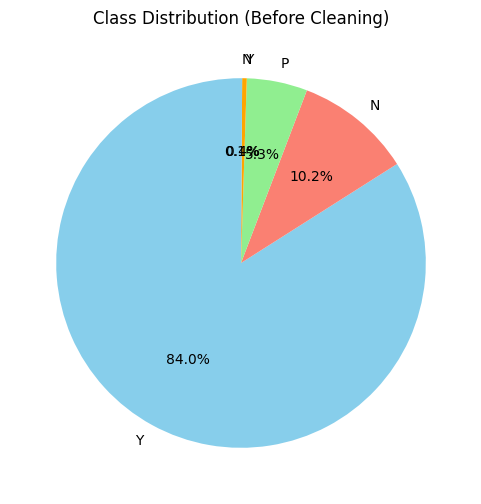

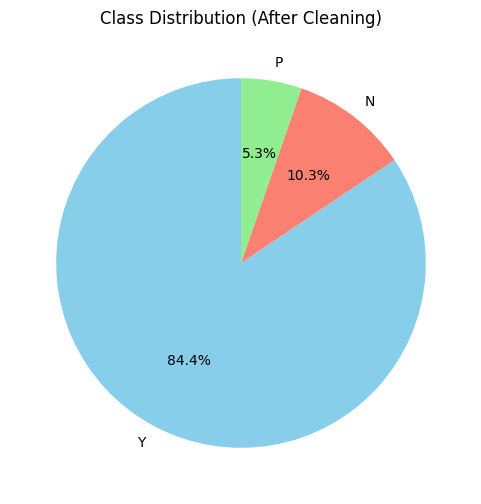

In [ ]:
# Plot showing class label distributions (Before Cleaning)
plt.figure(figsize=(6, 6))
df_copy['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon', 'lightgreen', 'orange'],
    startangle=90
)
plt.title("Class Distribution (Before Cleaning)")
plt.ylabel('')
plt.show()

# Plot showing class label distributions (After Cleaning)

df_copy['CLASS'] = df_copy['CLASS'].str.strip().str.upper()

plt.figure(figsize=(6, 6))
df_copy['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon','lightgreen'],
    startangle=90)
plt.title("Class Distribution (After Cleaning)")
plt.ylabel('')
plt.show()

Urea      Cr      
0.093750  0.071788    0.008
0.091146  0.062972    0.007
0.135417  0.088161    0.006
0.109375  0.059194    0.006
0.091146  0.040302    0.006
                      ...  
0.039062  0.083123    0.001
          0.056675    0.001
          0.055416    0.001
          0.041562    0.001
          0.039043    0.001
Name: proportion, Length: 620, dtype: float64


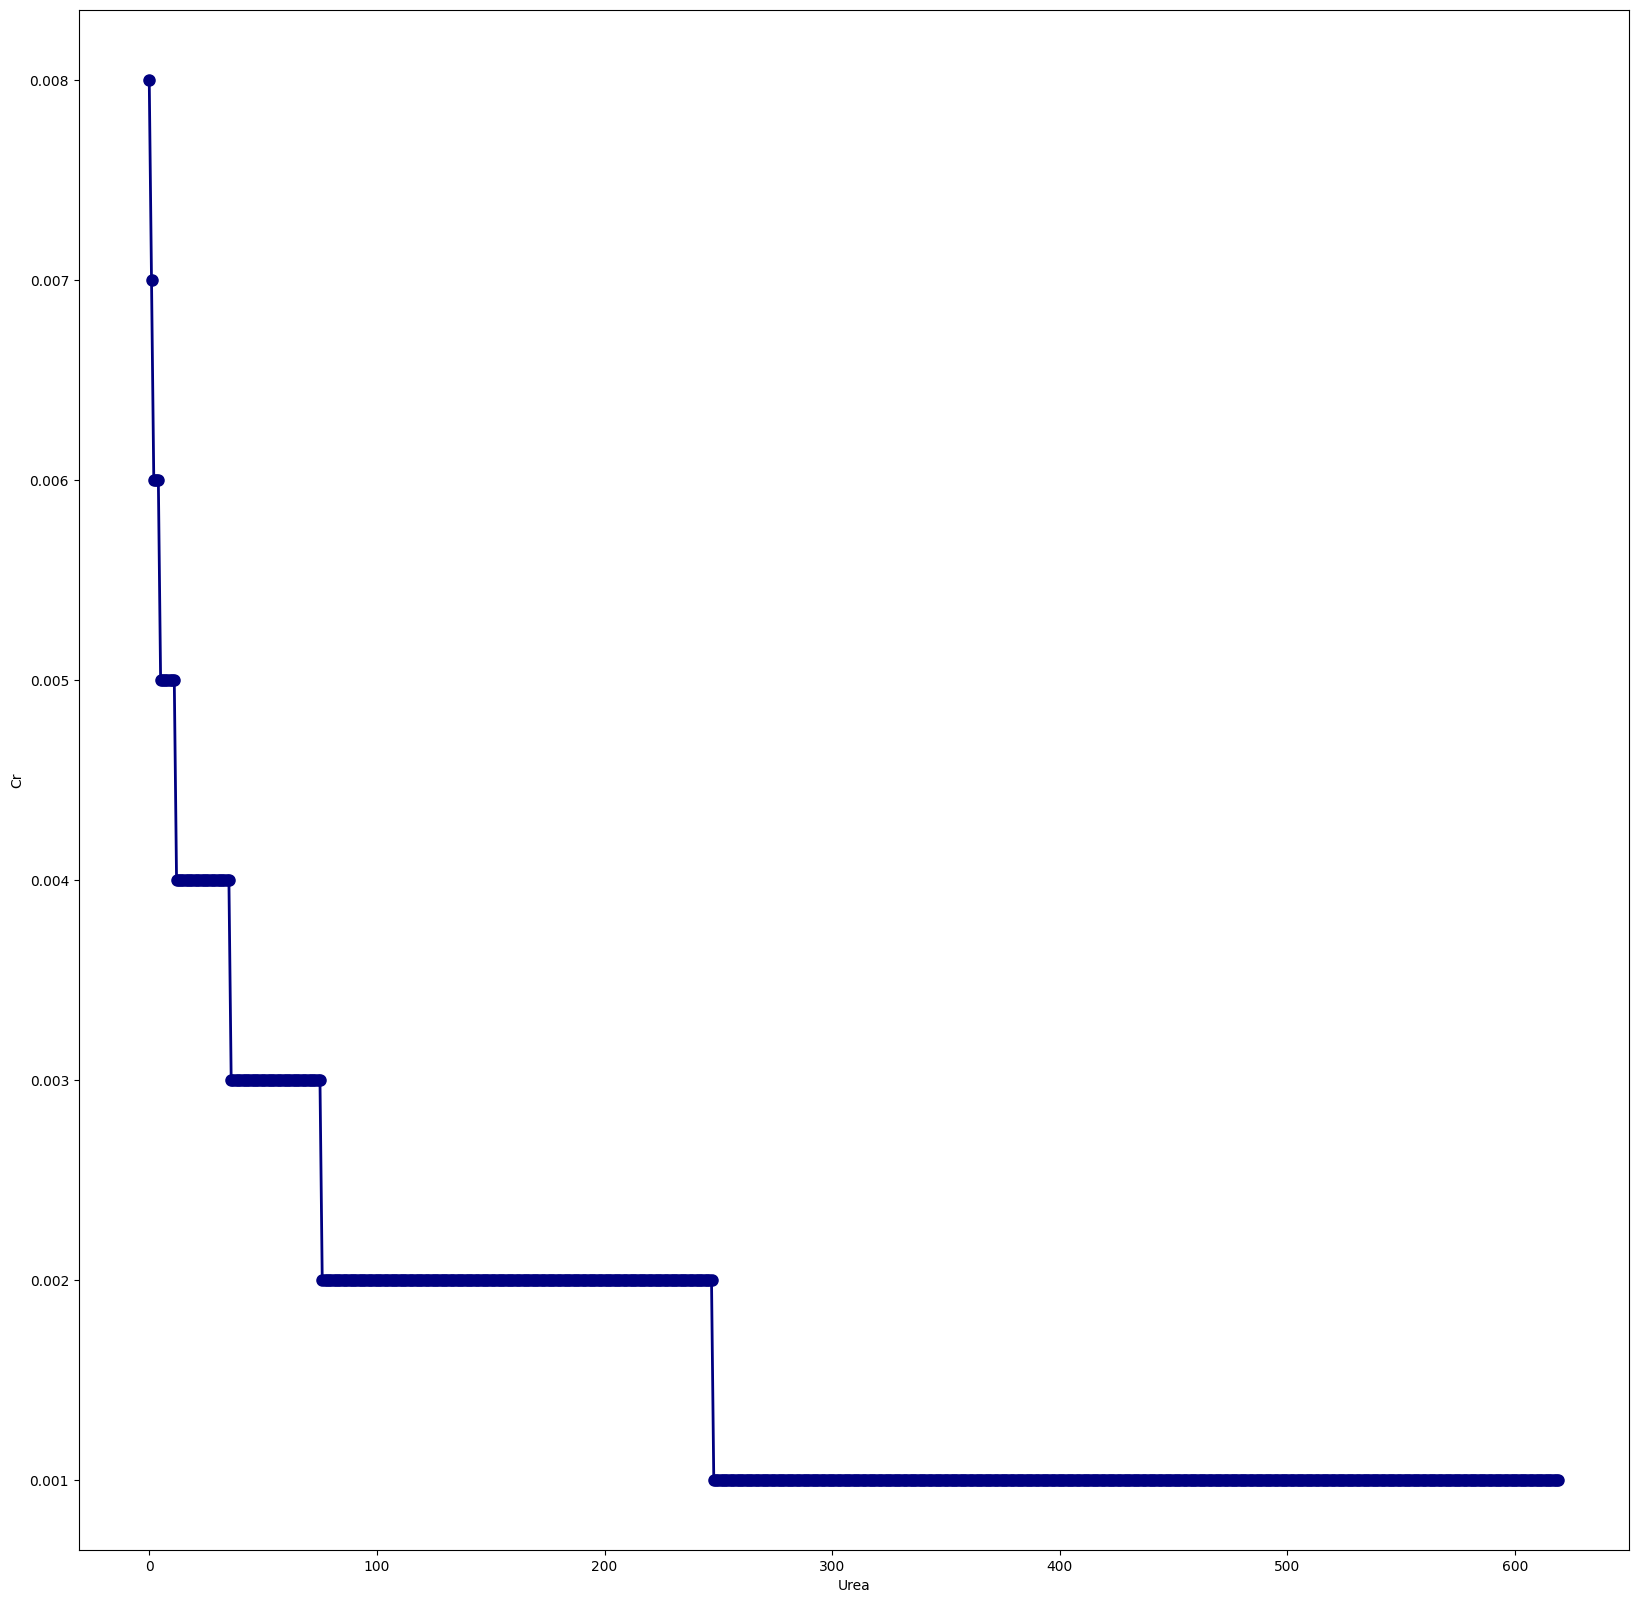

In [ ]:
data3 = df_copy[['Urea', 'Cr']].value_counts(normalize=True)
print(data3)
x = range(len(data3))
y= data3.values
plt.figure(figsize=(20,20))
plt.plot(x,y, color='#000080', marker='o', linestyle='-', linewidth=2, markersize=8, label='Pink Line')
plt.xlabel('Urea')
plt.ylabel('Cr')
plt.show()

The scatter plot illustrates the relationship between Urea and Creatinine levels in the dataset.
Each point represents an individual patient. The plot shows a positive correlation, indicating that as Urea levels increase, Creatinine levels also tend to increase.
This relationship aligns with medical expectations, as both indicators are commonly related to kidney function and tend to rise together in cases of renal impairment.


### 1.4 Distribution of Gender and CLASS

The following bar plots show how many males and females exist in the dataset, and how the samples are distributed among the classes (N, P, Y).


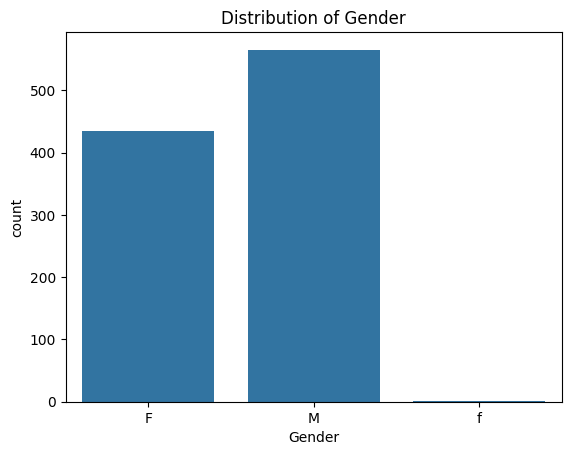

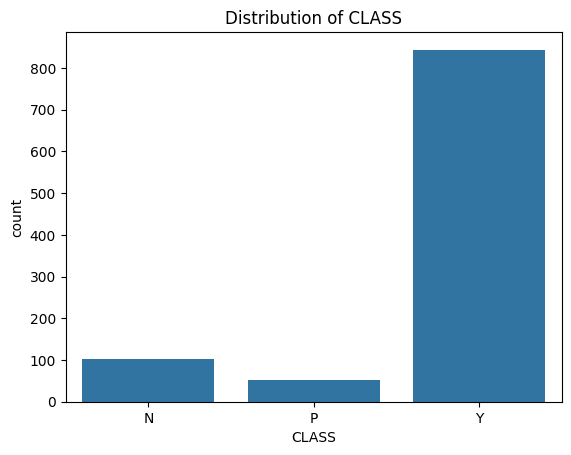

In [ ]:
# Bar plot for Gender
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

# Bar plot for CLASS
sns.countplot(x='CLASS', data=df)
plt.title("Distribution of CLASS")
plt.show()


**1.5 Missing values:**

In [ ]:

# Display missing values count and percentage for each column

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Rows with missing values:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


that all attributes (ID, No_Pation, Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, and CLASS) have  missing values which is 0 . This indicates that the dataset is complete with no missing data, and therefore no imputation or preprocessing is required for missing values.Note: The ID column is an identifier only and is not used for prediction. It has no missing values, which confirms that all records are properly indexed.

## Part 2: Data Preprocessing  

In this part, we focus on improving the quality and consistency of the dataset before analysis. The preprocessing stage ensures that the data is clean, accurate, and suitable for the next phases of the project.  





**`Overview of Data Preprocessing Tasks`**


1. **Noise Removal:** This process involves identifying and handling missing values, detecting and removing outliers, and deleting duplicate records. These steps reduce data errors and make the dataset more reliable.
2.    **Normalization:** All numerical attributes are scaled to a common range to prevent large values from dominating smaller ones, helping models perform more accurately.


1.   **Correlation Analysis:** The relationships between different attributes are examined to identify how variables are connected and to avoid redundancy.



1.    **Discretization and Encoding:** Continuous numerical attributes are divided into categories, and categorical attributes are encoded into numerical form to make the data more suitable for machine learning algorithms.
2.   **Feature Selection and Final Dataset:** The most important features are selected to improve performance and efficiency. After completing all preprocessing steps, the final preprocessed dataset is saved for later use in the project.











###2.1 Noise Removal

Checking for Missing Values

In this part, the dataset is examined to identify whether any attributes contain missing or null values.
Detecting missing values is an important step before performing other preprocessing tasks because missing data can affect the accuracy of the analysis. After running the check, it was found that all attributes in the dataset have zero missing values, which means the dataset is complete. Therefore, there is no need to remove rows with missing data or replace them with average or median values.

In [ ]:
#Check for missing values in the entire dataset
missing = df_copy.isna().sum()

#displaying the results
print("Missing values in each column:\n")
print(missing)

print("\ntotal number of missing values in the dataset:",missing.sum())


Missing values in each column:

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

total number of missing values in the dataset: 0


Detecting and Removing Outliers  

In this part, the dataset is checked for extreme values that are far from the normal range.  
Outliers can affect the accuracy of analysis and may lead to incorrect results if not handled properly.  
The mean method is used to identify and remove outliers from the numeric attributes.  
After running the check, only one record in the dataset was found to be an outlier and was removed, reducing the total number of rows from 1000 to 999.  



In [23]:
print("Detecting and Removing Outliers using the IQR Method")

# Select numeric columns
numeric_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Loop through each numeric column
for c in numeric_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the normal range
    df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]

# Display results
print("Original shape: (1000, 14)")
print("New shape after removing outliers (IQR Method):", df.shape)

print("\nPreview of data after applying IQR method:")
print(df.head())


Detecting and Removing Outliers using the IQR Method
Original shape: (1000, 14)
New shape after removing outliers (IQR Method): (678, 14)

Preview of data after applying IQR method:
     ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
5   634      34224      F   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4   
6   721      34225      F   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6   
7   421      34227      M   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4   
13  132      34234      F   45   4.6  54    5.1   4.2  1.7  1.2  2.2   0.8   
14  402      34235      F   50   3.5  39    4.0   4.0  1.5  1.2  2.2   0.7   

     BMI CLASS  
5   21.0     N  
6   24.0     N  
7   24.0     N  
13  23.0     N  
14  24.0     N  


In [22]:
print("Detecting and Removing Outliers using the Mean Method")

# Select numeric columns to apply the method on
numeric_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
#df= df.copy()

for c in numeric_cols:
    col = df_copy[c]

    mean = col.mean()
    differences_from_mean = abs(col - mean)
    max_difference_index = differences_from_mean.idxmax()
    df_no_outlier = df_copy.drop(max_difference_index)


print("Original DataFrame:")
print(df_copy.head())

print("\nDataFrame after removing the row with the largest difference from the mean:")
print(df_no_outlier.head())

print("Original shape:", df_copy.shape)
print("New shape after removing outliers:", df_no_outlier.shape)


Detecting and Removing Outliers using the Mean Method
Original DataFrame:
    ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI  CLASS AgeGroup  
0  24.0      0    31-50  
1  23.0      0     0-30  
2  24.0      0    31-50  
3  24.0      0    31-50  
4  21.0      0    31-50  

DataFrame after removing the row with the largest difference from the mean:
    ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1

Detecting and Removing Duplicate Records  

In this part, the dataset is examined to check if any duplicate records exist, which could occur if the same patient’s information was entered more than once.  
After running the check, no duplicate rows were found in the dataset, confirming that each patient record is unique and that the data is already clean and consistent.


In [ ]:
# --- Check and Remove Duplicates ---
duplicates = df_no_outlier.duplicated().sum()
print("Number of duplicate rows:", duplicates)

if duplicates > 0:
    df_no_outlier = df_no_outlier.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")



Number of duplicate rows: 0
No duplicate rows found.



# **Normalization**




In [ ]:

from sklearn.preprocessing import MinMaxScaler

# Select columns that need to be normalize
columns_to_normalize = [ 'AGE','Urea','Cr','HbA1c','Chol','TG','HDL','BMI']
data_to_normalize = df_copy[columns_to_normalize]

# Apply Min-Max scaling
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(data_to_normalize)

# Replace original values with normalized values
df_copy[columns_to_normalize] = normalized_data

print("Min-Max scaled data (selected columns normalized):")
print(df_copy.head())


Min-Max scaled data (selected columns normalized):
    ID  No_Pation Gender       AGE      Urea        Cr     HbA1c      Chol  \
0  502      17975      F  0.508475  0.109375  0.050378  0.264901  0.407767   
1  735      34221      M  0.101695  0.104167  0.070529  0.264901  0.359223   
2  420      47975      F  0.508475  0.109375  0.050378  0.264901  0.407767   
3  680      87656      F  0.508475  0.109375  0.050378  0.264901  0.407767   
4  504      34223      M  0.220339  0.171875  0.050378  0.264901  0.475728   

         TG       HDL  LDL  VLDL       BMI CLASS  
0  0.044444  0.226804  1.4   0.5  0.173913     N  
1  0.081481  0.092784  2.1   0.6  0.139130     N  
2  0.044444  0.226804  1.4   0.5  0.173913     N  
3  0.044444  0.226804  1.4   0.5  0.173913     N  
4  0.051852  0.061856  2.0   0.4  0.069565     N  


 Normalization technique was applied to the numerical columns (AGE, Urea, Cr, HbA1c, Chol, TG, HDL, BMI) to scale their values within the range of 0 to 1.
This process aims to eliminate differences in measurement scales between variables and enhance the accuracy of statistical analysis and subsequent models.
After applying normalization, all selected columns were transformed to the same range, making it easier to compare features without larger values dominating the results.

# **Discretization**

In [ ]:
#Discretization for column (Age)
columns_to_Discretize = 'AGE'

#The boundaries of the bins
bns = [0, 30 , 50 , 100]

#Labels for the age groups
labls = ['0-30' , '31-50' , '51-100']

#Perform discretization using cut function
df_copy['AgeGroup'] = pd.cut(df_copy[columns_to_Discretize] , bins=bns , labels= labls )

#Display the Discretizied columns
print("original DataFrame:")
print(df_copy[['AGE' ,'AgeGroup']])

original DataFrame:
     AGE AgeGroup
0     50    31-50
1     26     0-30
2     50    31-50
3     50    31-50
4     33    31-50
..   ...      ...
995   71   51-100
996   31    31-50
997   30     0-30
998   38    31-50
999   54   51-100

[1000 rows x 2 columns]


We applied **discretization** to the "**Age**" column, grouping it into meaningful ranges: [0–30, 31–50, 51–100]. This reduces noise, makes the data easier to interpret, and helps the model capture patterns more effectively than using raw continuous values.

### **Encoding**

In [ ]:
le = LabelEncoder()
df_copy['Gender'] = le.fit_transform(df['Gender'])
df_copy['CLASS'] = le.fit_transform(df['CLASS'])
print(df_copy)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS AgeGroup  
0    24.0  

**Encoding** was applied to the "**CLASS**" and "**Gender**" columns, converting their categorical values into numeric form. This ensures all data is numeric, consistent, and ready for analysis and modeling.

**Correlation**

###4.1 correlation coefficient (for numric attributes)

In [ ]:

import pandas as pd
import numpy as np




# Calculate the correlation matrix for numeric columns only
correlation_matrix =df_copy.corr(numeric_only=True)


# Loop through all numeric column pairs
print(" print all correlatied pairs : \n")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]   # define first column name
        col2 = correlation_matrix.columns[j]   # define second column name
        corr_value =correlation_matrix.iloc[i, j]  # get correlation value
        print(f"{col1} ↔ {col2} = {corr_value:.3f}")


# Set the threshold for high correlation
correlation_threshold = 0.75

# Find all pairs of attributes with correlation >= 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)

# Get all numeric column names
numeric_attributes = list(df.select_dtypes(include='number'))

# Create a set to store attributes that will be removed
attributes_to_remove =set()


# Loop through correlated pairs and mark one attribute from each pair
for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j)

# Print the attributes that have high correlation before removing them
print(" \n Highly correlated attributes :")
print(attributes_to_remove)

# Remove the highly correlated attributes from the dataset
df_filtered = df.drop(columns=attributes_to_remove)

# Print the original and filtered dataframes
print("\nOriginal Data:")
print(df)
print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)




 print all correlatied pairs : 

No_Pation ↔ ID = 0.065
Gender ↔ ID = 0.016
Gender ↔ No_Pation = 0.051
AGE ↔ ID = -0.066
AGE ↔ No_Pation = -0.088
AGE ↔ Gender = 0.022
Urea ↔ ID = -0.094
Urea ↔ No_Pation = -0.019
Urea ↔ Gender = 0.114
Urea ↔ AGE = 0.105
Cr ↔ ID = -0.102
Cr ↔ No_Pation = 0.001
Cr ↔ Gender = 0.152
Cr ↔ AGE = 0.055
Cr ↔ Urea = 0.624
HbA1c ↔ ID = -0.008
HbA1c ↔ No_Pation = -0.032
HbA1c ↔ Gender = -0.000
HbA1c ↔ AGE = 0.379
HbA1c ↔ Urea = -0.024
HbA1c ↔ Cr = -0.037
Chol ↔ ID = 0.044
Chol ↔ No_Pation = -0.030
Chol ↔ Gender = -0.063
Chol ↔ AGE = 0.037
Chol ↔ Urea = 0.002
Chol ↔ Cr = -0.007
Chol ↔ HbA1c = 0.177
TG ↔ ID = -0.056
TG ↔ No_Pation = -0.040
TG ↔ Gender = 0.050
TG ↔ AGE = 0.148
TG ↔ Urea = 0.041
TG ↔ Cr = 0.057
TG ↔ HbA1c = 0.219
TG ↔ Chol = 0.322
HDL ↔ ID = 0.026
HDL ↔ No_Pation = -0.013
HDL ↔ Gender = -0.127
HDL ↔ AGE = -0.020
HDL ↔ Urea = -0.037
HDL ↔ Cr = -0.024
HDL ↔ HbA1c = 0.029
HDL ↔ Chol = 0.104
HDL ↔ TG = -0.083
LDL ↔ ID = -0.064
LDL ↔ No_Pation = -0.003
LDL

This part of the code computes the correlation matrix between all numeric features in the dataset and prints the correlation values for each pair that includes VLDL. The results show that VLDL has  positive correlations with TG (0.14),and a negative correlation with HDL (-0.059). After checking for highly correlated pairs using the defined threshold (0.75), the program printed an empty set set() as shown, indicating that no attribute pairs exceeded the correlation limit chosen.

###4.2 chi squared (for the catogrical attributes )

In [ ]:
from scipy.stats import chi2_contingency


# Create a  table for Gender and CLASS
table = pd.crosstab(df_copy['Gender'], df_copy['CLASS'])
print("the table:")
print(table)

# Perform the chi-square test
chi2_, p_value, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2_)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("Expected Frequencies:")
print(expected)

the table:
CLASS    N  N    P    Y  Y 
Gender                     
F       64   0  17  353   0
M       38   1  36  486   4
f        0   0   0    1   0
Chi-Square Statistic: 22.947623719554986
Degrees of Freedom: 8
p-value: 0.003432146208288559
Expected Frequencies:
[[4.4268e+01 4.3400e-01 2.3002e+01 3.6456e+02 1.7360e+00]
 [5.7630e+01 5.6500e-01 2.9945e+01 4.7460e+02 2.2600e+00]
 [1.0200e-01 1.0000e-03 5.3000e-02 8.4000e-01 4.0000e-03]]



This code performs a Chi-Square test between Gender and CLASS.
 The p-value indicates whether there is a statistically significant relationship.

 If p-value ≤ 0.05 → reject H0 (there is a relationship),  (as shown )

 If p-value > 0.05 → fail to reject H0 (no significant relationship).

**Feature Selection**

In [ ]:
# -------------------------------
# Feature Selection (Filter Method using Chi-Square)
# -------------------------------

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df_copy.drop(columns=['CLASS', 'ID', 'No_Pation'], errors='ignore')
y = df_copy['CLASS']

# Normalize features to non-negative values (Chi-square requires this)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Apply Chi-square test to select best features
selector = SelectKBest(score_func=chi2, k='all')
fit = selector.fit(X_scaled, y)

# Create a DataFrame of features and their scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': fit.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print("Feature Importance based on Chi-Square Test:\n")
print(feature_scores)

# Choose top features (example: top 7 features with highest scores)
top_features = feature_scores.nlargest(7, 'Chi2 Score')['Feature'].tolist()
print("\nSelected Top Features:", top_features)

# Create a new DataFrame with selected features
df_selected = df_copy[top_features + ['CLASS']]
df_selected.head()


ValueError: could not convert string to float: '31-50'